<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [5]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv("customer segmentation/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.rename(columns={'Annual Income (k$)':'Income(k$)'}, inplace=True) 

Text(0, 0.5, 'Income(k$)')

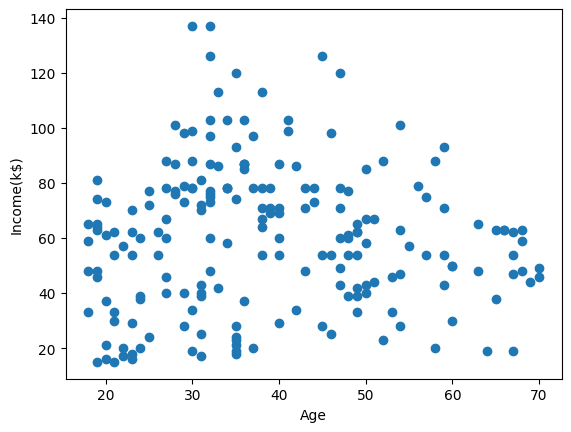

In [14]:
plt.scatter(df.Age,df['Income(k$)'])
plt.xlabel('Age')
plt.ylabel('Income(k$)')

In [16]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income(k$)']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [17]:
df['cluster']=y_predicted
df.head()

,CustomerID,Gender,Age,Income(k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [ ]:
km.cluster_centers_

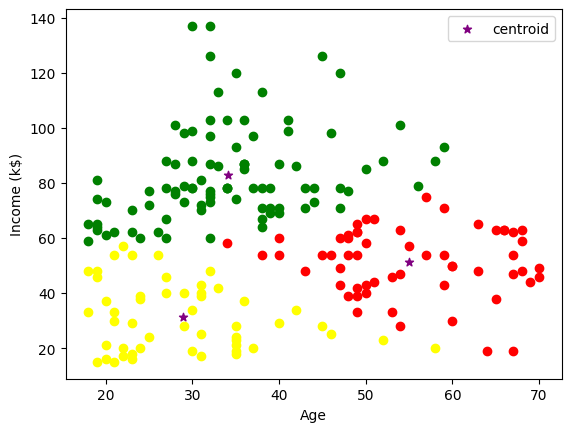

In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income(k$)'],color='green')
plt.scatter(df2.Age,df2['Income(k$)'],color='red')
plt.scatter(df3.Age,df3['Income(k$)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income (k$)')
plt.legend()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [21]:
scaler = MinMaxScaler()

scaler.fit(df[['Income(k$)']])
df['Income(k$)'] = scaler.transform(df[['Income(k$)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [22]:
df.head()

,CustomerID,Gender,Age,Income(k$),Spending Score (1-100),cluster
0,1,Male,0.019231,0.000000,39,2
1,2,Male,0.057692,0.000000,81,2
2,3,Female,0.038462,0.008197,6,2
3,4,Female,0.096154,0.008197,77,2
4,5,Female,0.250000,0.016393,40,2


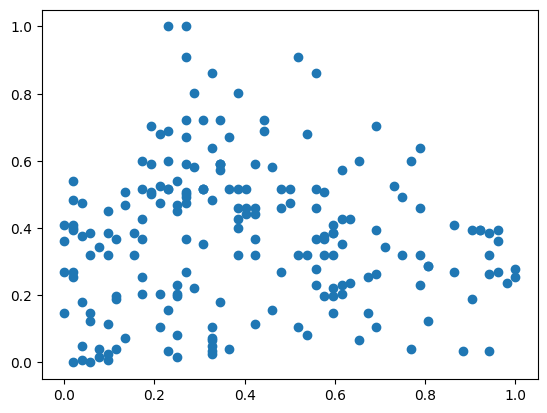

In [24]:
plt.scatter(df.Age,df['Income(k$)'])

In [25]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income(k$)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [26]:
df['cluster']=y_predicted
df.head()

,CustomerID,Gender,Age,Income(k$),Spending Score (1-100),cluster
0,1,Male,0.019231,0.000000,39,0
1,2,Male,0.057692,0.000000,81,0
2,3,Female,0.038462,0.008197,6,0
3,4,Female,0.096154,0.008197,77,0
4,5,Female,0.250000,0.016393,40,0


In [ ]:
km.cluster_centers_

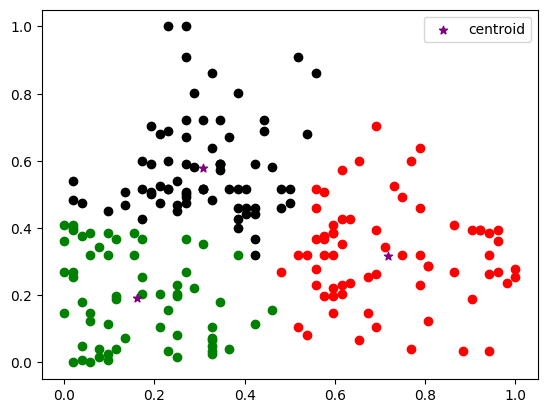

In [27]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income(k$)'],color='green')
plt.scatter(df2.Age,df2['Income(k$)'],color='red')
plt.scatter(df3.Age,df3['Income(k$)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

<h4 style='color:purple'>Elbow Plot</h4>

In [29]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income(k$)']])
    sse.append(km.inertia_)

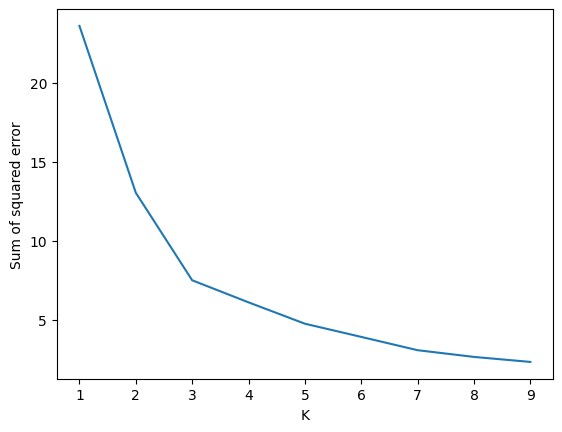

In [30]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

<h4 style='color:purple'>Exercise</h4>

<img src='iris.png' width=200 height=200>

In [32]:
import seaborn as sns

In [34]:
iris=sns.load_dataset('iris')

In [36]:
iris.drop('species',axis=1,inplace=True)

In [38]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

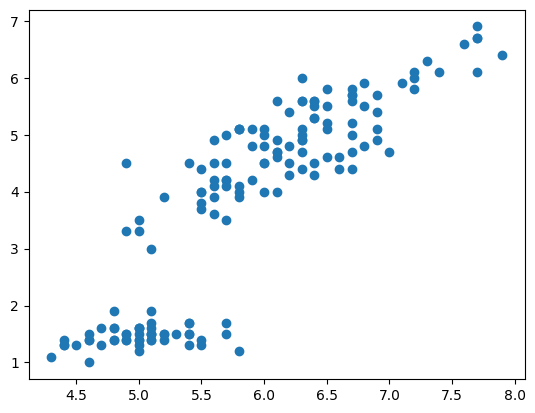

In [40]:
plt.scatter(iris['sepal_length'], iris['petal_length'])

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k